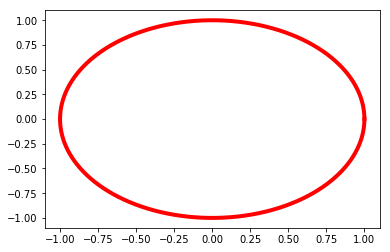

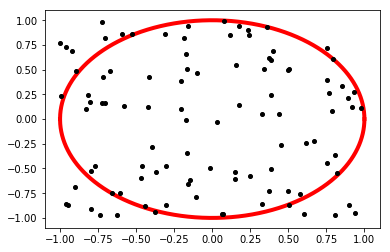

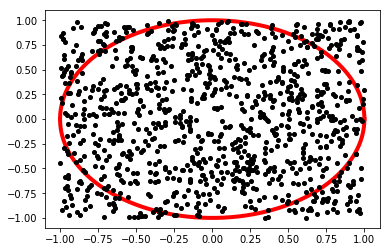

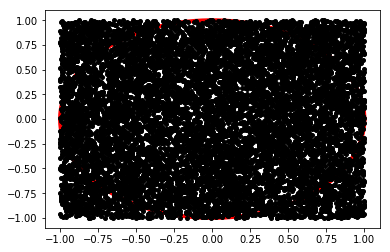

[3.04   3.096  3.1516]


In [2]:
# read this for the background information: https://en.wikipedia.org/wiki/Monte_Carlo_method

import numpy as np
import chaospy as cp
from matplotlib.pyplot import *

def compute_pi(no_samples, samples):
    area_square = no_samples
    area_circle = len([i for i in range(no_samples) if samples[0][i]**2 + samples[1][i]**2 <= 1.0])

    pi_approx = 4.0*area_circle/area_square

    return pi_approx


no_rand_vars = [100, 1000, 10000]
distr = cp.J(cp.Uniform(-1, 1), cp.Uniform(-1, 1))
np.random.seed(1) #Seed to be able to recreate runs

x = np.linspace(-1, 1, 10000)
y = np.sqrt(1 - x**2)

figure()
plot(x, y, 'r', linewidth=4.0)
plot(x, -y, 'r', linewidth=4.0)

pi_approx = np.zeros(len(no_rand_vars))
for i in range(len(no_rand_vars)):
    samples = distr.sample(no_rand_vars[i])

    pi_approx[i] = compute_pi(no_rand_vars[i], samples)

    figure()
    plot(x, y, 'r', linewidth=4.0)
    plot(x, -y, 'r', linewidth=4.0)
    plot(samples[0], samples[1], 'ko', markersize=4.0)

show()

print(pi_approx)
